In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data sampling
# full_df = pd.read_csv('fulldata.csv')
# full_df['Year'] = full_df['issue_d'].str.split('-').str[1]
# data = full_df.loc[full_df['Year'].isin(['2007', '2008','2009','2010','2011'])]
# data.to_csv('loan07-11.csv')

In [3]:
#Importing the data into a Pandas dataframe
df = pd.read_csv('loan07-11.csv',sep=',', dtype='unicode')

In [4]:
#Checking for null values per column
df.isnull().sum()

Unnamed: 0                                        0
id                                            42535
member_id                                     42535
loan_amnt                                         0
funded_amnt                                       0
funded_amnt_inv                                   0
term                                              0
int_rate                                          0
installment                                       0
grade                                             0
sub_grade                                         0
emp_title                                      2626
emp_length                                     1112
home_ownership                                    0
annual_inc                                        4
verification_status                               0
issue_d                                           0
loan_status                                       0
pymnt_plan                                        0
url         

In [5]:
#Checking for null values per column
df.isnull().sum()

Unnamed: 0                                        0
id                                            42535
member_id                                     42535
loan_amnt                                         0
funded_amnt                                       0
funded_amnt_inv                                   0
term                                              0
int_rate                                          0
installment                                       0
grade                                             0
sub_grade                                         0
emp_title                                      2626
emp_length                                     1112
home_ownership                                    0
annual_inc                                        4
verification_status                               0
issue_d                                           0
loan_status                                       0
pymnt_plan                                        0
url         

In [6]:
#Dropping columns having all NA values
blankColumns = df.columns[(df.isnull().sum() == df.shape[0])]
df = df.drop(blankColumns, axis=1)

In [7]:
#Generating the % of Null values in each column
(df.isnull().sum()/len(df.index))*100

Unnamed: 0                     0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.173739
emp_length                     2.614318
home_ownership                 0.000000
annual_inc                     0.009404
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
desc                          31.251910
purpose                        0.000000
title                          0.030563
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.068179
earliest_cr_line               0.068179


In [8]:
#Dropping columns with more than 60% NA values
sixty = df.columns[100*(df.isnull().sum()/len(df.index)) > 60]
df = df.drop(sixty, axis=1)

In [9]:
(df.isnull().sum()/len(df.index))*100

Unnamed: 0                     0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.173739
emp_length                     2.614318
home_ownership                 0.000000
annual_inc                     0.009404
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
desc                          31.251910
purpose                        0.000000
title                          0.030563
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.068179
earliest_cr_line               0.068179


In [10]:
#Keeping only the required columns after analysis
keep = ['funded_amnt','term','int_rate','installment','grade','sub_grade',
        'emp_length','home_ownership','annual_inc','verification_status',
        'issue_d','loan_status','purpose','zip_code','addr_state','dti',
        'delinq_2yrs','open_acc','total_acc']
df = df[keep]

In [11]:
#Data cleaning
#Dropping rows with Null values in Employee length
df = df[~df['emp_length'].isnull()]
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))

In [12]:
#Keeping only Fully Paid and Charged Off loans
df = df.loc[df['loan_status'].isin(['Fully Paid','Charged Off'])]
df['loan_status'].value_counts()

Fully Paid     33268
Charged Off     5440
Name: loan_status, dtype: int64

In [13]:
#Cleaning the term column for modelling part
df['term'] = df['term'].apply(lambda x: re.findall('\d+', str(x))[0])
df['term'] = df['term'].apply(lambda x: pd.to_numeric(x))

In [14]:
df['issue_d'] = df['issue_d'].str.split('-').str[1]

In [15]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_encoded'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_encoded'] = df['loan_encoded'].apply(lambda x: pd.to_numeric(x))

In [16]:
# converting loan_status to integer type
df['loan_encoded'].value_counts()

0    33268
1     5440
Name: loan_encoded, dtype: int64

In [17]:
#Changing column type
df['funded_amnt'] = df['funded_amnt'].astype(float)
df['int_rate'] = df['int_rate'].astype(float)
df['installment'] = df['installment'].astype(float)
df['annual_inc'] = df['annual_inc'].astype(float)
df['dti'] = df['dti'].astype(float)
df['delinq_2yrs'] = df['delinq_2yrs'].astype(float)
df['open_acc'] = df['open_acc'].astype(float)
df['total_acc '] = df['total_acc'].astype(float)

In [18]:
lb_make = LabelEncoder()
df['grade_encoded'] = lb_make.fit_transform(df['grade'])

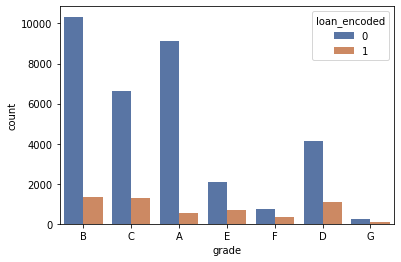

In [19]:
# plotting default rates across grade of the loan
sns.countplot(x='grade',hue='loan_encoded',palette='deep', data=df)
plt.show()

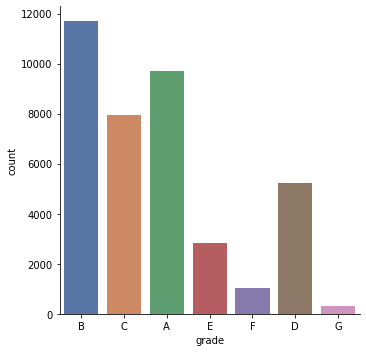

In [20]:
#Plotting the number of records per grade
sns.catplot(x="grade", kind="count", palette="deep", data=df);

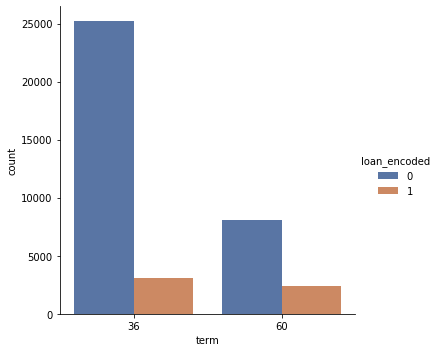

In [21]:
#Plotting the frequency of Fully paid and Charged Off loans for every loan term
sns.catplot(x="term", kind="count", palette="deep", data=df,hue='loan_encoded');

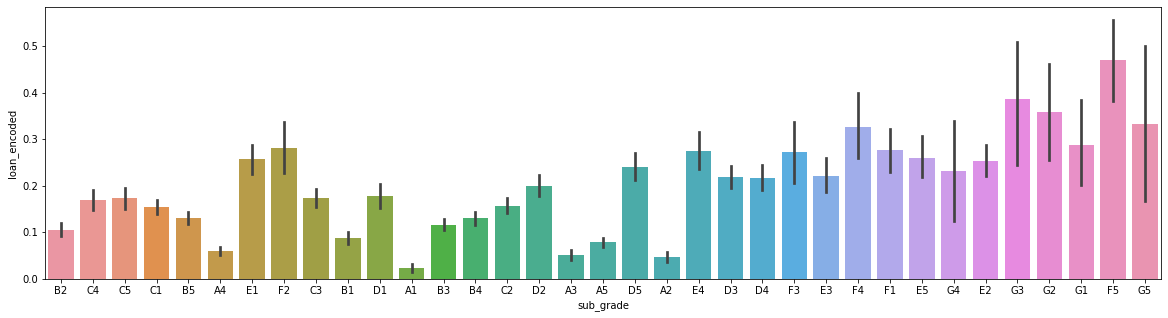

In [22]:
#Plotting the frequency per Sub Grade
plt.figure(figsize=(20, 5))
sns.barplot(x="sub_grade", y='loan_encoded', data=df);

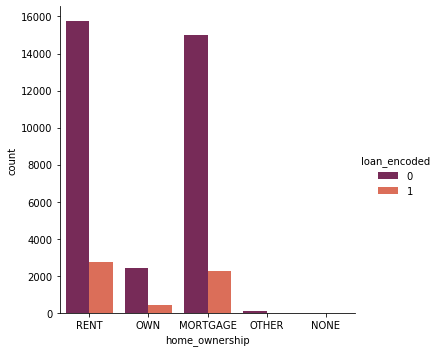

In [23]:
sns.catplot(x="home_ownership", kind="count", palette="rocket", data=df,hue='loan_encoded');

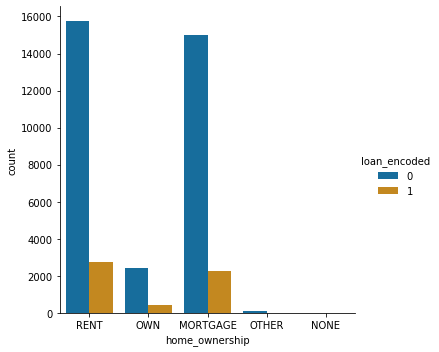

In [24]:
sns.catplot(x="home_ownership", kind="count", palette="colorblind", data=df, hue='loan_encoded');

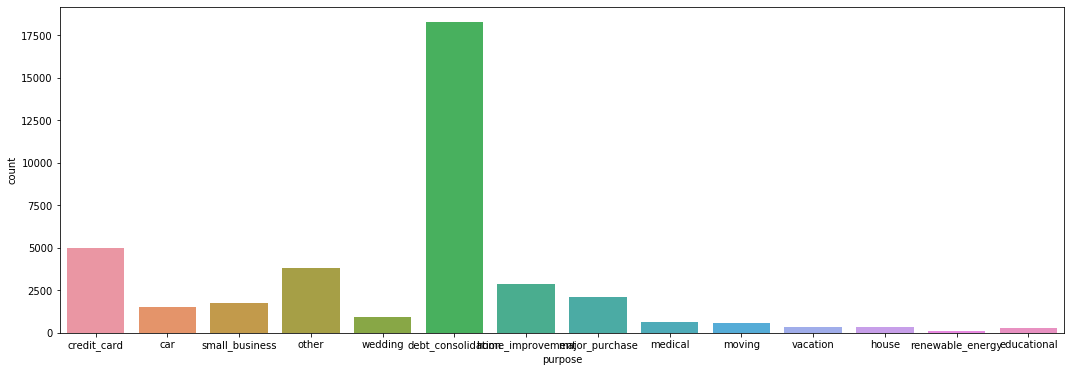

In [25]:
plt.figure(figsize=(18, 6))
sns.countplot(x="purpose", data=df)

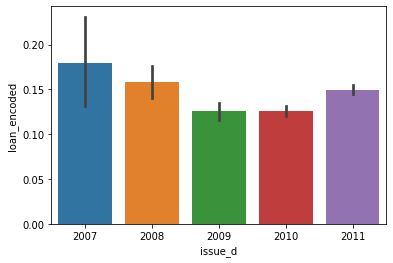

In [26]:
sns.barplot(x='issue_d', y='loan_encoded', data=df)

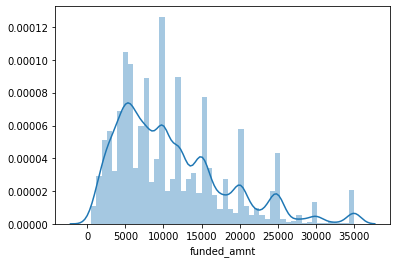

In [27]:
# loan amount: the median loan amount is around 10,000
sns.distplot(df['funded_amnt'])

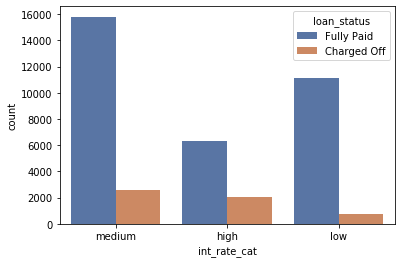

In [28]:
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate_cat'] = df['int_rate'].apply(lambda x: int_rate(x))
df['int_rate_cat'].value_counts()

sns.countplot(x="int_rate_cat", data=df,palette='deep',hue='loan_status')

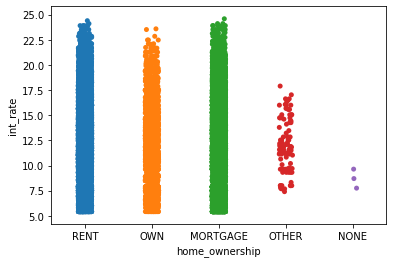

In [29]:
sns.stripplot(x=df['home_ownership'], y=df['int_rate'], data=df)

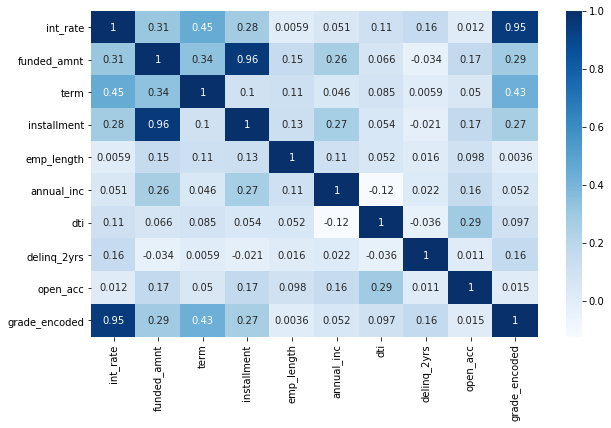

In [30]:
#correlation heatmap
plt.figure(figsize=(10, 6))
df_h=df[['int_rate','funded_amnt','term','installment','emp_length','annual_inc','dti','delinq_2yrs','open_acc','total_acc','grade_encoded','total_acc']]
sns.heatmap(df_h.corr(),annot=True,cmap='Blues')

/Users/pavandoodi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


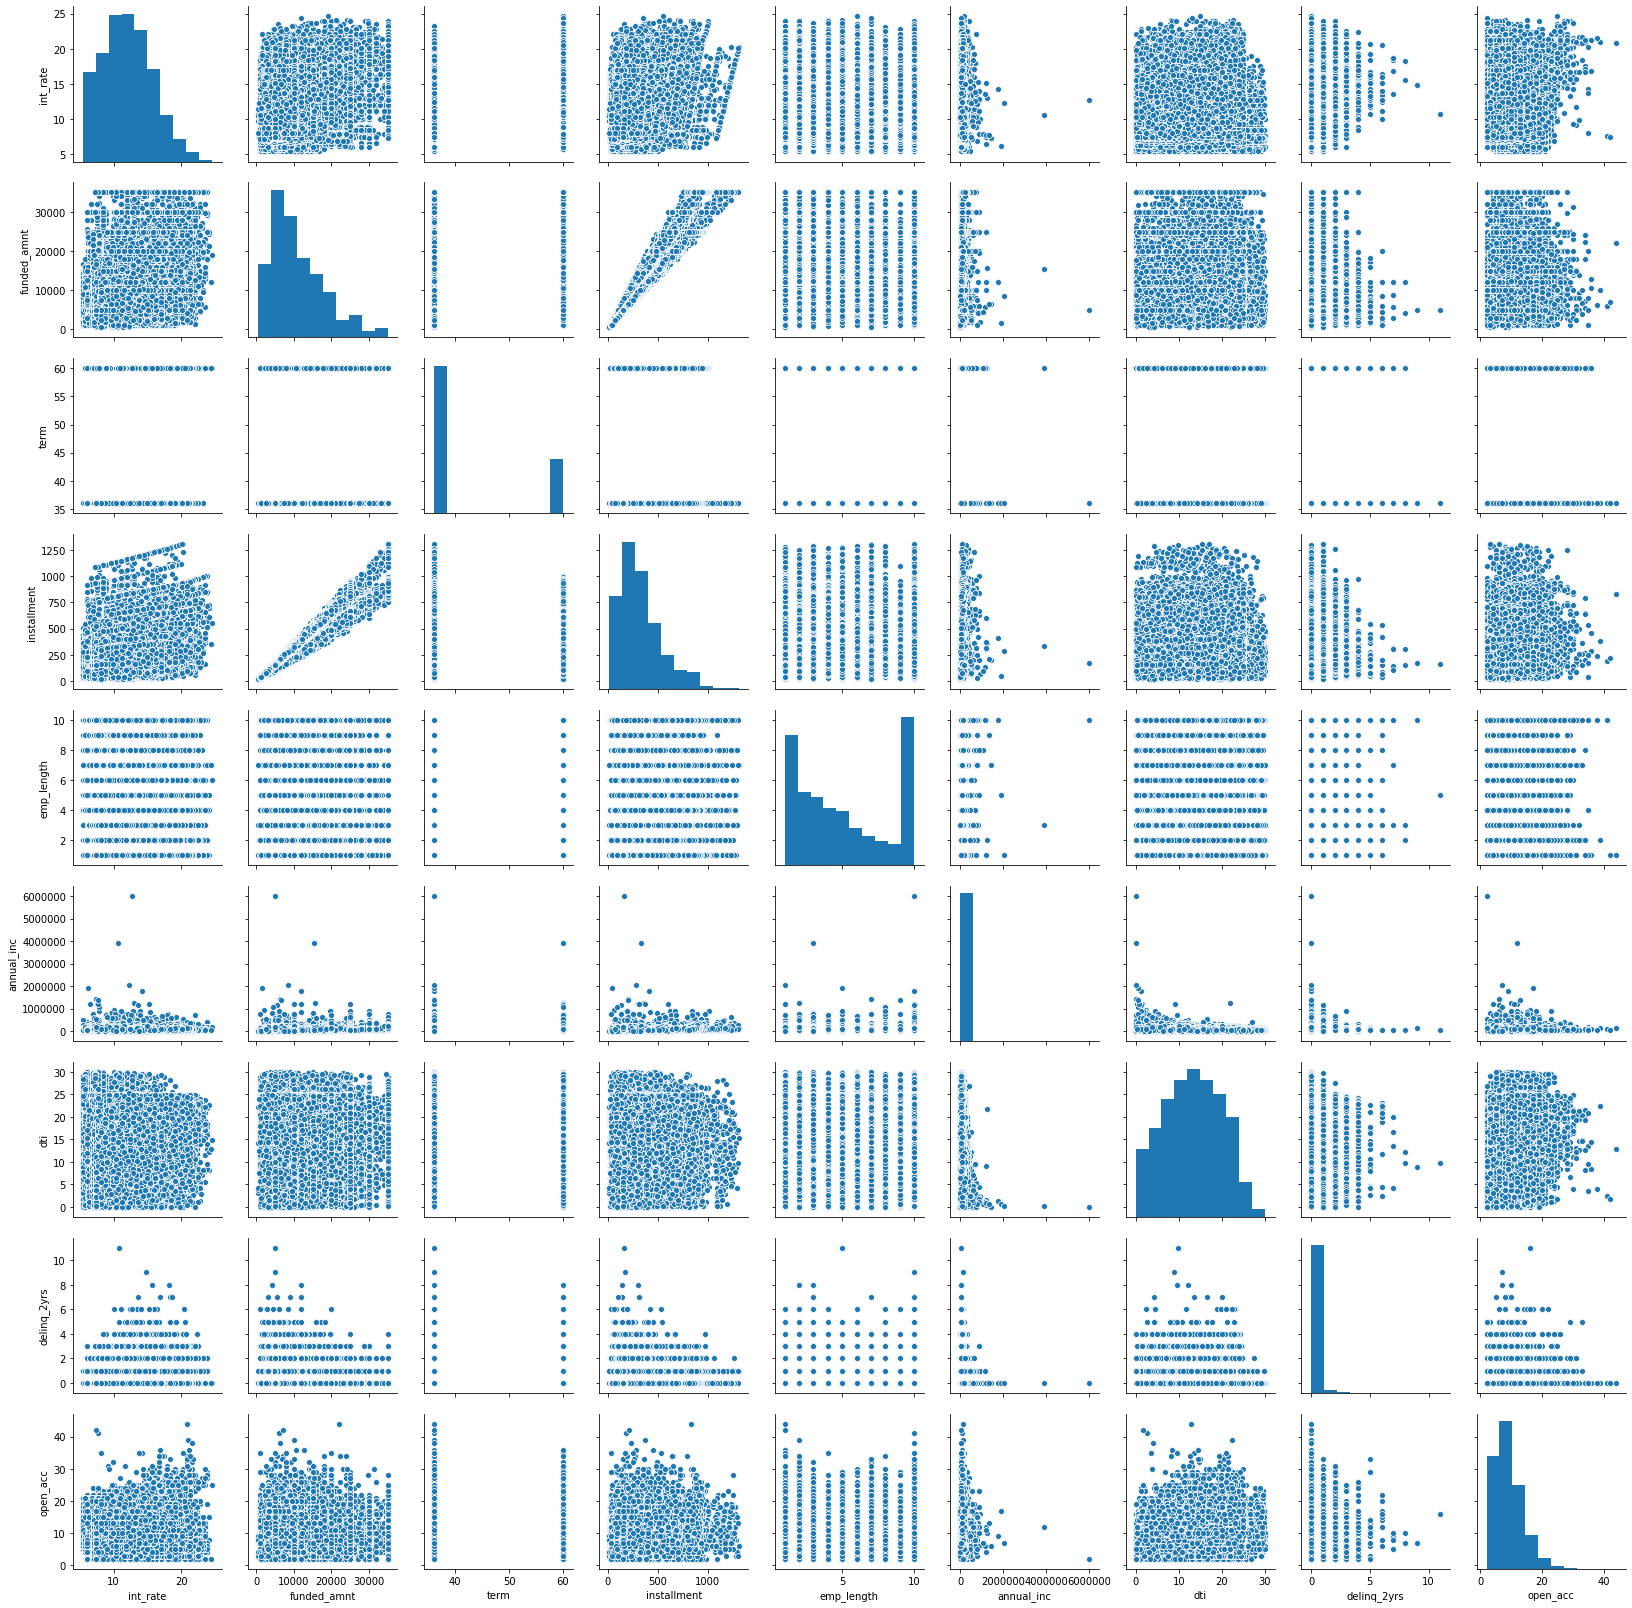

In [31]:
df_h['loan_status']=df['loan_encoded']
sns.pairplot(df_h.iloc[:,:9])

In [32]:
df['issue_d'] = df['issue_d'].str.split('-').str[1]

In [33]:
def expand(dataframe, column, pre):
    dataframe = pd.concat([dataframe, pd.get_dummies(dataframe[column], prefix=pre)],axis=1)
    dataframe = dataframe.drop(column, axis=1)
    return(dataframe)

In [34]:
#One hot encoding of categorical variables
df = expand(df,'home_ownership', 'HO')
df = expand(df,'verification_status', 'VS')
df = expand(df,'loan_status', 'LS')
df = expand(df,'purpose', 'P')
df = expand(df,'issue_d', 'Year')

In [35]:
def grade(n):
    if n == 'A' or n == 'B':
        return 'low'
    elif n == 'C' or n == 'D':
        return 'medium'
    else:
        return 'high'
    
    
df['grade_class'] = df['grade'].apply(lambda x: grade(x))

In [36]:
#Encoding the target variable
lb_make = LabelEncoder()
df['grade_encoded'] = lb_make.fit_transform(df['grade_class'])

In [37]:
#Dataset for Linear Regression predicting Interest Rate
df_l=df

In [38]:
#Dropping columns which are not relevant for grade_class prediction
df = df.drop(['sub_grade', 'zip_code', 'grade','addr_state','int_rate','installment', 'grade_class', 'int_rate_cat'], axis=1)

In [39]:
#Changing column type
df['funded_amnt'] = df['funded_amnt'].astype(float)
df['annual_inc'] = df['annual_inc'].astype(float)
df['dti'] = df['dti'].astype(float)
df['delinq_2yrs'] = df['delinq_2yrs'].astype(float)
df['open_acc'] = df['open_acc'].astype(float)
df['total_acc'] = df['total_acc'].astype(float)

In [40]:
#X,y split
X = df.loc[:, df.columns != 'grade_encoded']  # Features
y = df['grade_encoded']  # Labels

In [41]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [42]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Predicting using the created model
y_pred=clf.predict(X_test)

In [43]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.6195642814087661
[[ 337  273  666]
 [  97 5364  991]
 [ 201 2190 1494]]


In [44]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5844312408507707


In [45]:
#Create a svm Classifier
clf = svm.SVC(gamma='scale') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5555842590200637


In [46]:
#Logistic Regression
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)
# use the model to make predictions with the test data
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/Users/pavandoodi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.5628175320761216


In [47]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
y_pred = neigh.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7296994747265995


In [48]:
clf = AdaBoostClassifier(n_estimators=1000, random_state=0)
clf.fit(X, y)  
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
        learning_rate=1.0, n_estimators=1000, random_state=0)
clf.feature_importances_  

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6379057952294842


In [49]:
#MinMax Normalisation
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
Xn=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [50]:
# 70% training and 30% test
Xn_train, Xn_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3)

In [51]:
#KNN Classification
neigh = KNeighborsClassifier(n_neighbors=2,p=1,metric='minkowski', leaf_size=30)
neigh.fit(Xn, y)
y_pred = neigh.predict(Xn_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.757254800654439


In [52]:
# Implementing PCA 
from sklearn.decomposition import PCA
pca=PCA()
principalComponents=pca.fit_transform(X)
principalDf=pd.DataFrame(data=principalComponents)
principalDf

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-45778.518415,4658.436040,12.442330,-2.273245,15.696313,-7.341774,-1.925871,0.247415,-0.335673,-0.566142,...,0.002874,-0.000258,-0.001910,0.000119,2.504313e-10,2.537572e-10,1.771801e-10,-2.239732e-11,6.838472e-11,-8.555021e-12
1,-39856.131301,7337.110374,21.598036,21.612163,-10.603851,2.985240,-1.114906,0.677511,1.186520,-0.531661,...,-0.005602,0.000792,-0.005594,0.000126,-1.218619e-10,-7.060957e-11,-3.497482e-11,-2.274393e-11,3.882291e-11,9.385229e-13
2,-57599.156759,6905.213105,11.974425,-2.110746,-3.451246,-7.041729,-0.995893,0.412948,-0.296691,0.514380,...,-0.007818,-0.004988,-0.003689,0.000035,1.234462e-10,1.229818e-11,-6.314644e-11,1.653063e-11,3.579911e-11,8.475091e-12
3,-20439.997351,415.841426,-22.842792,-6.315166,3.398681,-5.490910,-1.965669,0.945532,-0.415899,-0.546424,...,0.009368,0.000233,-0.003979,-0.000229,2.648280e-10,-3.928221e-11,-5.011093e-12,-3.780808e-12,-1.898016e-11,8.630263e-12
4,10136.398994,8335.676140,-27.218632,21.091277,1.029651,5.254855,-0.794156,0.683971,-0.528857,-0.477916,...,0.004797,0.001882,-0.002799,-0.000427,-1.599242e-11,-9.456846e-11,-2.465236e-11,4.227831e-12,-3.701656e-11,-4.187116e-12
5,-33783.907395,5018.043430,10.113920,-3.405800,-0.282670,1.980198,1.831804,0.375532,-0.317519,-0.724069,...,-0.012731,0.000813,-0.008210,0.000059,-9.911314e-11,7.398733e-12,6.967006e-12,-1.429578e-12,-1.272987e-11,2.258800e-11
6,-22724.915006,3348.689188,10.918743,20.458017,10.707084,-3.123136,0.857888,0.410483,-0.573487,0.837958,...,0.000417,0.003864,0.000275,-0.000144,1.004741e-09,-4.819465e-11,1.861339e-11,-1.185016e-11,-8.140240e-12,-7.616023e-13
7,-21849.232038,7376.758127,22.164258,-2.012249,-4.564728,-4.853637,2.213010,0.533621,-0.356399,-0.732248,...,-0.002318,0.001096,-0.005892,0.000143,-4.195698e-10,2.567565e-11,6.161615e-11,-1.550087e-11,7.088891e-12,-5.016665e-12
8,-29767.723138,4538.169434,8.921636,19.938879,-7.142951,2.675627,4.429854,0.206035,1.338323,-0.517034,...,-0.001428,-0.014569,-0.005369,-0.000081,1.750002e-12,-1.175523e-10,2.380968e-10,1.179411e-09,5.540994e-11,-3.611779e-11
9,-54763.238840,4013.891678,21.659426,20.957564,5.971814,1.970374,-3.595084,0.354952,1.266981,-0.345328,...,-0.002692,-0.002036,-0.001318,-0.000494,-1.652213e-12,-1.493677e-11,3.017912e-11,9.368318e-12,-8.198480e-12,-1.034917e-11


In [53]:
#Explained VAriance 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.88463778e-01, 1.15361236e-02, 5.94000362e-08, 2.39776976e-08,
       9.56555551e-09, 2.68480374e-09, 2.19429053e-09, 9.45403336e-11,
       8.41331578e-11, 7.68810177e-11, 6.44197024e-11, 6.06652278e-11,
       5.71400740e-11, 2.68231370e-11, 2.40463523e-11, 1.94983524e-11,
       1.47934714e-11, 1.17569528e-11, 9.60074527e-12, 6.40016964e-12,
       4.58086152e-12, 3.64528819e-12, 2.57330290e-12, 2.20972519e-12,
       2.00631000e-12, 8.03818841e-13, 6.25988525e-13, 2.31389241e-14,
       9.17136264e-33, 9.17136264e-33, 9.17136264e-33, 9.17136264e-33,
       9.17136264e-33, 9.17136264e-33])

In [54]:
principalDf['grade_encoded']=df['grade_encoded']

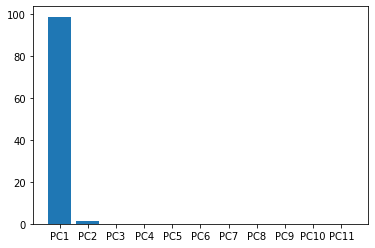

In [55]:
import numpy as np
variance = list(explained_variance[:11])
#Rounding off to 2 decimal paces
variance = [(round(i * 100 , 2)) for i in variance]
height = variance
bars = ('PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Show graphic
plt.show()

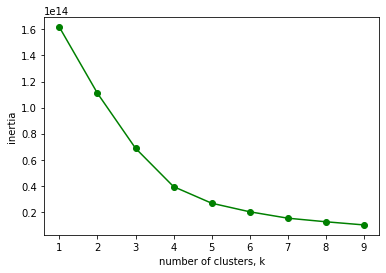

In [56]:
# Plotting Elbow Point
from sklearn.cluster import KMeans
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
        # Fit model to samples
    model.fit(principalDf.iloc[:,:10])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='green')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [57]:
#KMeans Clustering
from sklearn.cluster import KMeans
#df=StandardScaler().fit_transform(df)
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

In [58]:
#Clustering
from sklearn.preprocessing import StandardScaler
def cluster_kmean(col1, col2):
    X=StandardScaler().fit_transform(df[[col1,col2]])
    km = KMeans(
        n_clusters=3, init='random',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )
    y_km = km.fit_predict(X)

    # plot the 3 clusters
    plt.scatter(
        X[y_km == 0, 0], X[y_km == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
    )

    plt.scatter(
        X[y_km == 1, 0], X[y_km == 1, 1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2'
    )

    plt.scatter(
        X[y_km == 2, 0], X[y_km == 2, 1],
        s=50, c='lightblue',
        marker='v', edgecolor='black',
        label='cluster 3'
    )

    # plot the centroids
    plt.scatter(
        km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )
    plt.legend(scatterpoints=1)
    plt.grid()
    return plt.show()


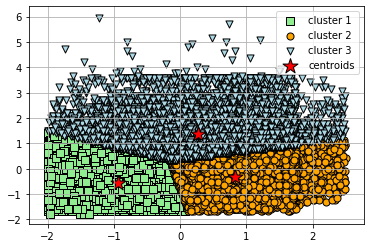

In [59]:
cluster_kmean('dti', 'total_acc')

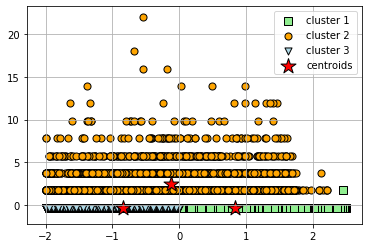

In [60]:
cluster_kmean('dti', 'delinq_2yrs')

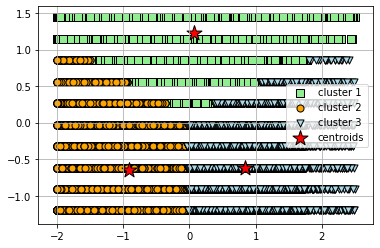

In [61]:
cluster_kmean('dti', 'emp_length')

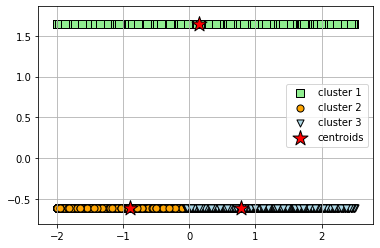

In [62]:

cluster_kmean('dti', 'term')

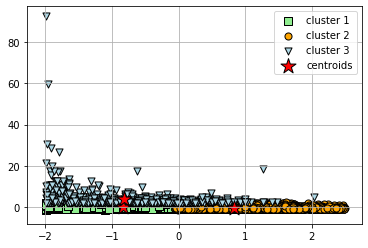

In [63]:
cluster_kmean('dti', 'annual_inc')

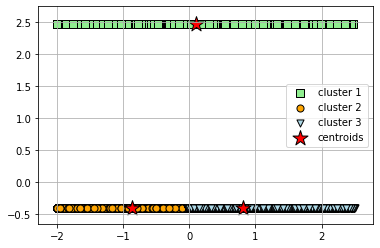

In [64]:
cluster_kmean('dti', 'loan_encoded')

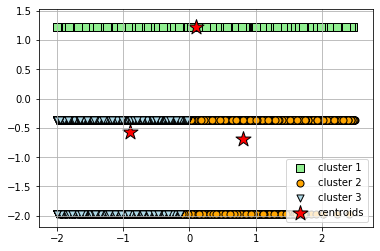

In [65]:
cluster_kmean('dti', 'grade_encoded')


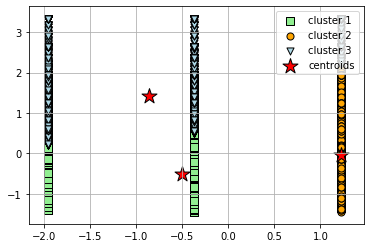

In [66]:
cluster_kmean('grade_encoded', 'funded_amnt')

In [67]:
X = df_l[['funded_amnt', 'term','emp_length', 'annual_inc','dti',
       'delinq_2yrs', 'total_acc', 'loan_encoded','grade_encoded']].values
y = df_l['int_rate'].values

In [68]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_,columns=['Coefficient']) 
print(coeff_df)
y_pred = regressor.predict(X_test)


   Coefficient
0     0.000116
1     0.133876
2    -0.056314
3     0.000002
4     0.059286
5     1.314054
6    -0.052173
7     1.305669
8     0.535204


In [69]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score',r2_score(y_test, y_pred) )

Mean Absolute Error: 2.5166304301618365
Mean Squared Error: 9.502530383257369
Root Mean Squared Error: 3.0826174565225197
R2 Score 0.30715083788416897


In [70]:
regressor.score(X,y)

0.3172388487933887